In [2]:
import pickle

data = None
labels = None

path = ''

with open(path+'img_data_rgb','rb') as f:
    data = pickle.load(f)
with open(path+'img_labels_rgb','rb') as f:
    labels = pickle.load(f)
    
print(data.shape, labels.shape)

(5966, 15360) (5966,)


In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

h = 80
w = 64
ch = 3
data = data.reshape((data.shape[0], h, w, ch))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

Using TensorFlow backend.


(4563, 80, 64, 3) (4563, 4)
(508, 80, 64, 3) (508, 4)
(895, 80, 64, 3) (895, 4)


In [4]:
import keras 
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout
from keras.layers import BatchNormalization, Activation

NUM_EPOCHS=50

In [ ]:
shape = x_train[0].shape
layer = [4, 8, 16, 32, 64, 88, 216]
pos = 1

model = Sequential()
model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape ))
#model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape ))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

pos += 1

model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

pos += 1

model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

pos += 1

model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(4, activation='softmax'))
 
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 64, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 8, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)             

Train on 4563 samples, validate on 508 samples
Epoch 1/50
4563/4563 [==============================] - 8s 2ms/step - loss: 1.0573 - accuracy: 0.5240 - val_loss: 0.7795 - val_accuracy: 0.6240
Epoch 2/50
4563/4563 [==============================] - 1s 181us/step - loss: 0.5937 - accuracy: 0.7629 - val_loss: 0.4733 - val_accuracy: 0.8248
Epoch 3/50
4563/4563 [==============================] - 1s 185us/step - loss: 0.4358 - accuracy: 0.8286 - val_loss: 0.3696 - val_accuracy: 0.8484
Epoch 4/50
4563/4563 [==============================] - 1s 192us/step - loss: 0.3841 - accuracy: 0.8442 - val_loss: 0.3293 - val_accuracy: 0.8799
Epoch 5/50
4563/4563 [==============================] - 1s 182us/step - loss: 0.3672 - accuracy: 0.8374 - val_loss: 0.3125 - val_accuracy: 0.8839
Epoch 6/50
4563/4563 [==============================] - 1s 189us/step - loss: 0.3569 - accuracy: 0.8444 - val_loss: 0.3616 - val_accuracy: 0.8287
Epoch 7/50
4563/4563 [==============================] - 1s 183us/step - loss: 0

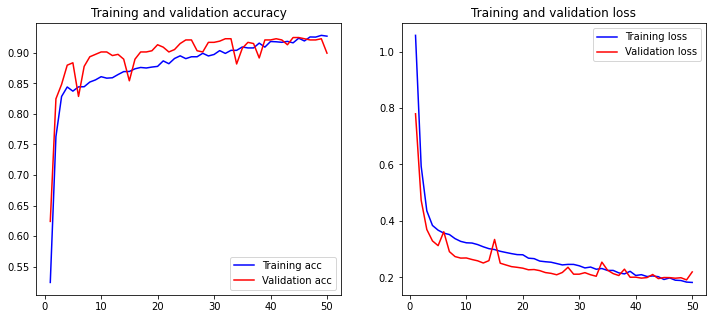

In [ ]:
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_data=(x_valid, y_valid))

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss' )
plt.legend()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.concatenate((x_train,x_valid),axis=0)
y_train = np.concatenate((y_train,y_valid),axis=0)

scores=[]
for i in range(0,10):
    shape = x_train[0].shape
    layer = [4, 8, 16, 32, 64, 88, 216]
    pos = 1

    model = Sequential()
    model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape, kernel_regularizer=keras.regularizers.l2(0.001) ))
    #model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    pos += 1

    model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
    #model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    pos += 1

    model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
    #model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    pos += 1

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    adam = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    #x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)
    history = model.fit(x_train, y_train, epochs=20, validation_split=0.1, verbose=0, use_multiprocessing=True)

    val_acc = history.history['val_accuracy']
    score = np.mean(val_acc[-4:])
    print(score)
    scores.append(score)


0.8607283532619476
0.8567913472652435
0.8661417365074158
0.8646653592586517
0.8612204790115356
0.8651574850082397
0.8494094610214233
0.8562992215156555
0.8444882035255432
0.8725393712520599


Train on 4563 samples, validate on 508 samples
Epoch 1/50
4563/4563 [==============================] - 1s 269us/step - loss: 1.0570 - accuracy: 0.5244 - val_loss: 0.6921 - val_accuracy: 0.7441
Epoch 2/50
4563/4563 [==============================] - 1s 194us/step - loss: 0.5669 - accuracy: 0.7699 - val_loss: 0.4657 - val_accuracy: 0.8169
Epoch 3/50
4563/4563 [==============================] - 1s 198us/step - loss: 0.4834 - accuracy: 0.7968 - val_loss: 0.4108 - val_accuracy: 0.8406
Epoch 4/50
4563/4563 [==============================] - 1s 196us/step - loss: 0.4399 - accuracy: 0.8205 - val_loss: 0.3780 - val_accuracy: 0.8465
Epoch 5/50
4563/4563 [==============================] - 1s 188us/step - loss: 0.4129 - accuracy: 0.8273 - val_loss: 0.4590 - val_accuracy: 0.7972
Epoch 6/50
4563/4563 [==============================] - 1s 194us/step - loss: 0.4007 - accuracy: 0.8356 - val_loss: 0.3379 - val_accuracy: 0.8780
Epoch 7/50
4563/4563 [==============================] - 1s 196us/step - loss:

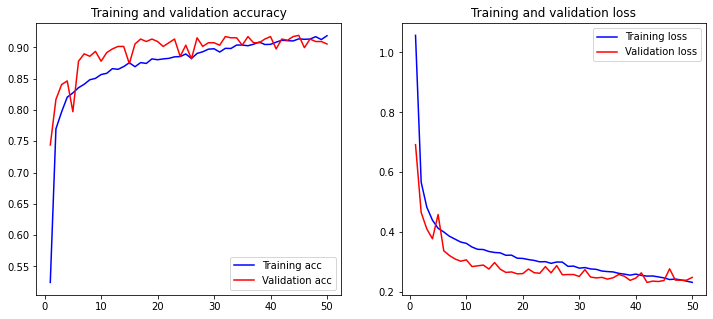

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_data=(x_valid, y_valid))

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss' )
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
 
y_pred = model.predict(x_test)

y_test_cp = np.argmax( y_test, axis=1)
y_pred_cp = np.argmax( y_pred, axis=1)
print()
dt = pd.DataFrame(confusion_matrix(y_test_cp, y_pred_cp))
display(dt)
print(classification_report(y_test_cp, y_pred_cp, zero_division=0))

,0,1,2,3
0,107,0,0,0
1,1,345,48,1
2,0,34,244,1
3,1,1,0,112


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       0.91      0.87      0.89       395
           2       0.84      0.87      0.85       279
           3       0.98      0.98      0.98       114

    accuracy                           0.90       895
   macro avg       0.93      0.93      0.93       895
weighted avg       0.90      0.90      0.90       895



In [ ]:
import pickle

with open('CLF_CNN_rgb','wb') as f:
    pickle.dump(model, f)

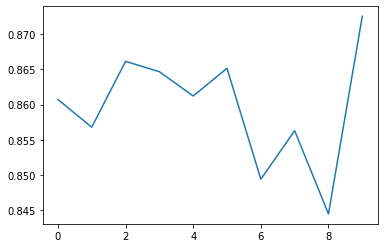

In [7]:
plt.figure()
plt.plot(scores)
plt.show()

In [ ]:
with open('CNN_rgb_score','wb') as f:
  pickle.dump(scores,f)